In [3]:
pip install numpy pandas matplotlib seaborn scikit-learn 



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Import clean dataset

In [5]:
clean_df = pd.read_csv('clean_resume_data.csv')
clean_df.shape

(2484, 3)

Data Analysis

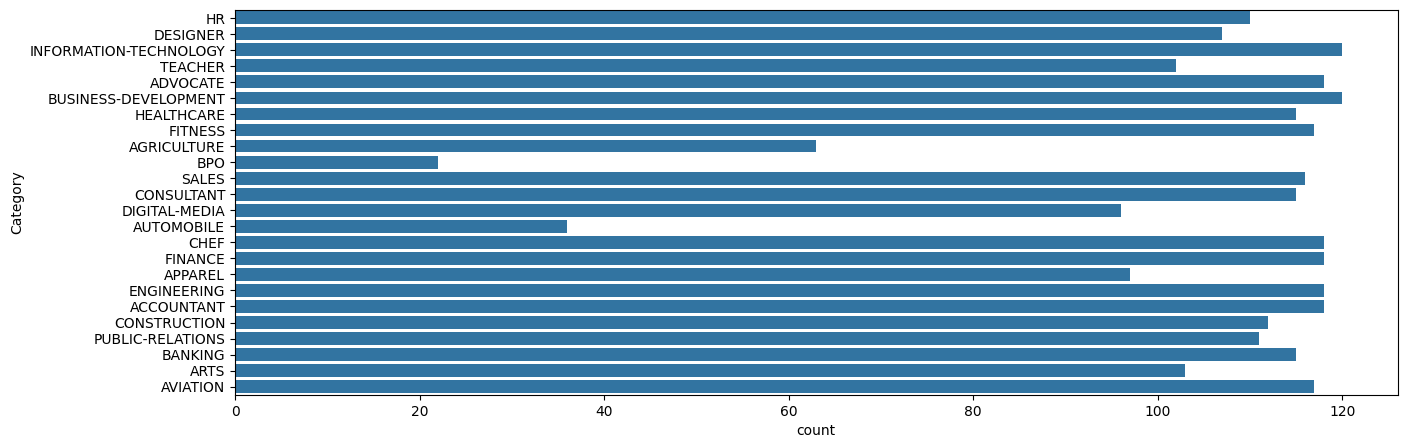

In [6]:
plt.figure(figsize=(15, 5))
sns.countplot(clean_df['Category'])
plt.show()

([<matplotlib.patches.Wedge at 0x11ac90450>,
 [Text(1.0873558985304643, 0.16630438939188294, 'HR'),
  Text(0.9879404766659289, 0.483708191542274, 'DESIGNER'),
  Text(0.8001110148396715, 0.754865792000294, 'INFORMATION-TECHNOLOGY'),
  Text(0.5427552970145121, 0.9567741047722231, 'TEACHER'),
  Text(0.2374045338432916, 1.0740759225076455, 'ADVOCATE'),
  Text(-0.08893988033794423, 1.0963985122597861, 'BUSINESS-DEVELOPMENT'),
  Text(-0.40741943831722166, 1.0217677824639413, 'HEALTHCARE'),
  Text(-0.6887871215943964, 0.8576551178216723, 'FITNESS'),
  Text(-0.9089746228635491, 0.6194878005175476, 'AGRICULTURE'),
  Text(-1.0497142428046182, 0.3287856573105451, 'BPO'),
  Text(-1.099928739161177, 0.012520733497043118, 'SALES'),
  Text(-1.0573112973650307, -0.3034679891920658, 'CONSULTANT'),
  Text(-0.9258571907028171, -0.593959983857404, 'DIGITAL-MEDIA'),
  Text(-0.7197732137004842, -0.8318212072550671, 'AUTOMOBILE'),
  Text(-0.45983078365386687, -0.9992775642454258, 'CHEF'),
  Text(-0.166304862

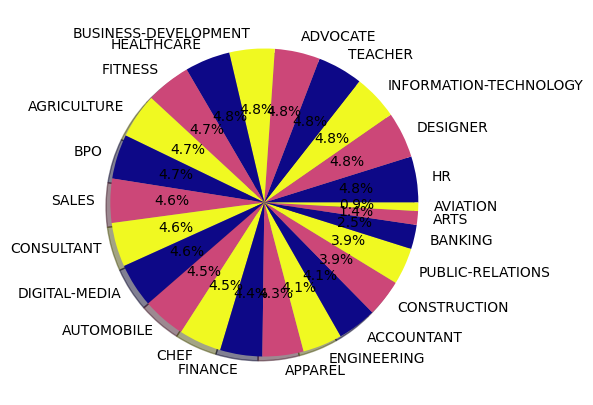

In [7]:
counts = clean_df['Category'].value_counts()
labels = clean_df['Category'].unique()
plt.figure(figsize=(15,5))
plt.pie(counts,labels=labels,autopct='%1.1f%%', shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))

Balance Dataset

In [9]:
from sklearn.utils import resample

# Get the maximum value of the value_counts of the 'Category' column
max_count = clean_df['Category'].value_counts().max()

# Resample each category to match maximum count
balanced_data = []

for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category'] == category]
    
    if len(category_data) < max_count:
        # Oversample with replacement if the category has fewer samples than max_count
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    elif len(category_data) > max_count:
        # Undersample without replacement if the category has more samples than max_count
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    else:
        # If the category has exactly max_count samples, use it as is
        balanced_category_data = category_data
    
    balanced_data.append(balanced_category_data)

# Concatenate all balanced categories into a single DataFrame
balanced_df = pd.concat(balanced_data)

In [10]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: count, dtype: int64

In [13]:
#check for null values
balanced_df.isnull().sum

#remove the null values
balanced_df.dropna(inplace=True)

Train Test Split

In [17]:
X = balanced_df['Feature']
Y = balanced_df['Category']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

Encoding (putting it in vector form)

In [18]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Train Random Forest Classifier

In [31]:
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, Y_train)

# Step 4: Accuracy Evaluation
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8628472222222222


In [33]:
print(classification_report(Y_test,y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.74      0.95      0.83        21
              ADVOCATE       1.00      0.79      0.88        29
           AGRICULTURE       0.94      0.74      0.83        23
               APPAREL       0.95      0.86      0.90        21
                  ARTS       1.00      0.73      0.84        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.91      1.00      0.95        30
               BANKING       0.94      0.74      0.83        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.46      0.61      0.52        18
                  CHEF       0.84      0.96      0.90        28
          CONSTRUCTION       0.82      0.92      0.87        25
            CONSULTANT       1.00      0.65      0.78        31
              DESIGNER       0.96      0.96      0.96        28
         DIGITAL-MEDIA       0.95      

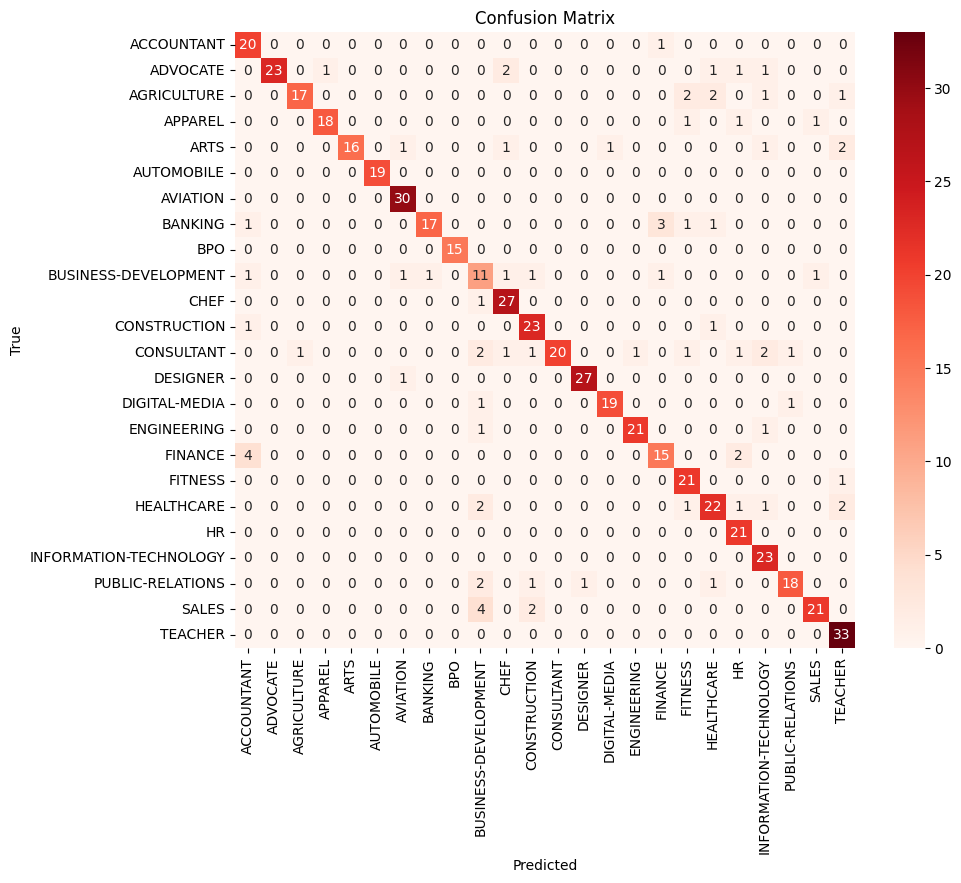

In [37]:
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()